In [ ]:
pip install git+https://github.com/bianchimario/MARS

In [6]:
from downtime import load_dataset
import matplotlib.pyplot as plt
import lightgbm as lgb
from sklearn.metrics import classification_report
from MARS import get_shapelets, get_distances  
import numpy as np

# Getting the data

In [7]:
d = load_dataset("SelfRegulationSCP1")

X_train = d.X_train
X_test = d.X_test
y_train = d.y_train
y_test = d.y_test

In [4]:
print(d)

X_train: (268, 6, 896)
X_test: (293, 6, 896)
y_train: (268,)
y_test: (293,)
Metadata:
{'labels': {'0': 'negativity', '1': 'positivity'},
 'name': 'SelfRegulationSCP1',
 'task': 'classification'}


In [20]:
X_train

<Array [[[23, 21.7, ..., 21.5], ...], ...] type='268 * var * var * float64'>

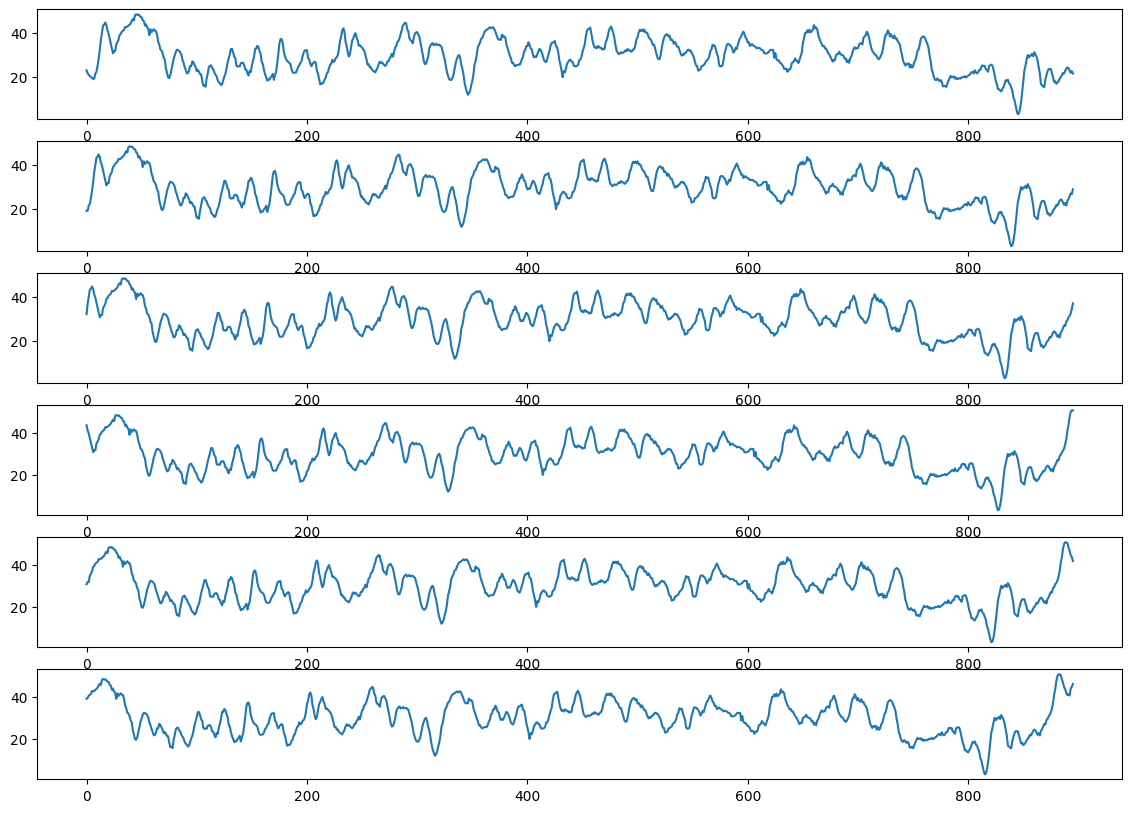

In [4]:
plt.figure(figsize=(14,10))

for i,dim in enumerate(d.X_train[0]):
    plt.subplot(6,1,i+1)
    plt.plot(dim)

# Multivariate Asynchronous Random Shapelets

In [8]:
# Getting shapelets
shapelets = get_shapelets(X_train, num_shapelets=1, len_shapelets=20, async_shapelets=True, seed=10)

In [9]:
shapelets[0]

[<Array [33.9, 32.7, 31.1, 31.8, ..., 34.1, 34.8, 34.9] type='20 * float64'>,
 <Array [43.8, 44.4, 45.5, 46.3, ..., 42.6, 42, 39.1, 41.7] type='20 * float64'>,
 <Array [33, 34.7, 38.3, 41, ..., 33.2, 32.4, 32.8, 32.7] type='20 * float64'>,
 <Array [37, 35.8, 34.6, 34.7, ..., 38.4, 38.8, 36.8, 37.1] type='20 * float64'>,
 <Array [30.7, 30.7, 30.7, 31, ..., 25.7, 25, 23.6, 23.7] type='20 * float64'>,
 <Array [48.6, 48.3, 48.5, 48, ..., 41.8, 41, 40.9, 39.1] type='20 * float64'>]

In [13]:
print('Num. shapelets = ', len(shapelets))
print('Num. dimensions = ', len(shapelets[0]))
print('Length of each shapelet dimension = ', len(shapelets[0][0]))

Num. shapelets =  268
Num. dimensions =  6
Length of each shapelet dimension =  20


In [14]:
# Transforming training set (getting distances from shapelets)
X_train_transformed = get_distances(X_train, shapelets)

In [15]:
X_train_transformed

[[0.0,
  60.33038287380756,
  65.41262734582949,
  101.85451102227537,
  94.27709979521264,
  56.50536449999007,
  246.40810847894736,
  71.31112713174358,
  418.4019126851215,
  67.22450119800212,
  1351.355611610083,
  123.27673733763237,
  49.977624421886006,
  102.81499036798354,
  59.737516131392525,
  1731.9461092923457,
  98.97979953731988,
  541.8964070392879,
  54.623786768723534,
  78.77157907769919,
  484.72834700123474,
  116.5876534798958,
  50.01638078025124,
  748.0584901933368,
  67.57513777563973,
  153.49192773863427,
  95.03008651404589,
  78.46224177236616,
  80.033450539825,
  63.05695819390962,
  179.68913988946545,
  73.87465617728856,
  155.6265239677057,
  131.82996804082094,
  802.3978853397849,
  79.76536067058983,
  55.11510694898064,
  60.65471863193051,
  395.90173691339646,
  77.55839792975641,
  59.095063597495496,
  53.64745208104199,
  382.16198070112574,
  105.54777330328452,
  90.60020984436004,
  144.8748995544878,
  464.0324485817821,
  234.8538251

In [19]:
print(len(X_train_transformed))
print(len(X_train_transformed[0]))


268
268


In [23]:
X_test_transformed = get_distances(X_test, shapelets)

# Classification

In [20]:
clf = lgb.LGBMClassifier()
clf.fit(X_train_transformed, y_train)

LGBMClassifier()

## Training set

In [21]:
y_pred_train = clf.predict(X_train_transformed)

In [22]:
print(classification_report(y_train, y_pred_train))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       135
           1       1.00      1.00      1.00       133

    accuracy                           1.00       268
   macro avg       1.00      1.00      1.00       268
weighted avg       1.00      1.00      1.00       268



## Test set

In [24]:
y_pred_test = clf.predict(X_test_transformed)

In [25]:
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.84      0.48      0.61       147
           1       0.63      0.90      0.75       146

    accuracy                           0.69       293
   macro avg       0.73      0.69      0.68       293
weighted avg       0.74      0.69      0.68       293

